## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 0.01

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.036765


0:	learn: 0.9793830	total: 47.7ms	remaining: 47.7s
1:	learn: 0.9582303	total: 49.1ms	remaining: 24.5s
2:	learn: 0.9353695	total: 50ms	remaining: 16.6s
3:	learn: 0.9161608	total: 50.9ms	remaining: 12.7s
4:	learn: 0.8990488	total: 51.9ms	remaining: 10.3s
5:	learn: 0.8832373	total: 52.7ms	remaining: 8.73s
6:	learn: 0.8650817	total: 53.5ms	remaining: 7.59s
7:	learn: 0.8477194	total: 54.4ms	remaining: 6.75s
8:	learn: 0.8311338	total: 55.2ms	remaining: 6.08s
9:	learn: 0.8132347	total: 56.1ms	remaining: 5.55s
10:	learn: 0.7953546	total: 56.9ms	remaining: 5.11s
11:	learn: 0.7796915	total: 57.8ms	remaining: 4.76s
12:	learn: 0.7641617	total: 58.6ms	remaining: 4.45s
13:	learn: 0.7484061	total: 59.4ms	remaining: 4.19s
14:	learn: 0.7353909	total: 60.3ms	remaining: 3.96s
15:	learn: 0.7199546	total: 61.2ms	remaining: 3.76s
16:	learn: 0.7058790	total: 62ms	remaining: 3.59s
17:	learn: 0.6928959	total: 62.8ms	remaining: 3.43s
18:	learn: 0.6802797	total: 63.7ms	remaining: 3.29s
19:	learn: 0.6666222	total

112:	learn: 0.2825964	total: 144ms	remaining: 1.13s
113:	learn: 0.2811402	total: 145ms	remaining: 1.13s
114:	learn: 0.2797104	total: 146ms	remaining: 1.13s
115:	learn: 0.2785930	total: 147ms	remaining: 1.12s
116:	learn: 0.2773867	total: 148ms	remaining: 1.12s
117:	learn: 0.2762157	total: 149ms	remaining: 1.11s
118:	learn: 0.2751476	total: 150ms	remaining: 1.11s
119:	learn: 0.2742685	total: 150ms	remaining: 1.1s
120:	learn: 0.2732505	total: 151ms	remaining: 1.1s
121:	learn: 0.2722779	total: 152ms	remaining: 1.09s
122:	learn: 0.2706818	total: 153ms	remaining: 1.09s
123:	learn: 0.2699505	total: 154ms	remaining: 1.09s
124:	learn: 0.2691699	total: 155ms	remaining: 1.08s
125:	learn: 0.2678759	total: 155ms	remaining: 1.08s
126:	learn: 0.2667829	total: 156ms	remaining: 1.07s
127:	learn: 0.2658124	total: 157ms	remaining: 1.07s
128:	learn: 0.2648855	total: 158ms	remaining: 1.07s
129:	learn: 0.2641466	total: 159ms	remaining: 1.06s
130:	learn: 0.2633410	total: 160ms	remaining: 1.06s
131:	learn: 0.

157:	learn: 0.2412654	total: 182ms	remaining: 970ms
158:	learn: 0.2408174	total: 183ms	remaining: 968ms
159:	learn: 0.2401391	total: 184ms	remaining: 965ms
160:	learn: 0.2396371	total: 185ms	remaining: 962ms
161:	learn: 0.2390494	total: 186ms	remaining: 960ms
162:	learn: 0.2387350	total: 186ms	remaining: 957ms
163:	learn: 0.2379292	total: 187ms	remaining: 954ms
164:	learn: 0.2372001	total: 188ms	remaining: 951ms
165:	learn: 0.2366878	total: 189ms	remaining: 949ms
166:	learn: 0.2363036	total: 190ms	remaining: 946ms
167:	learn: 0.2355500	total: 190ms	remaining: 943ms
168:	learn: 0.2349215	total: 191ms	remaining: 941ms
169:	learn: 0.2341849	total: 192ms	remaining: 938ms
170:	learn: 0.2335247	total: 193ms	remaining: 936ms
171:	learn: 0.2330065	total: 194ms	remaining: 934ms
172:	learn: 0.2326195	total: 195ms	remaining: 931ms
173:	learn: 0.2319223	total: 196ms	remaining: 928ms
174:	learn: 0.2313989	total: 196ms	remaining: 925ms
175:	learn: 0.2306230	total: 197ms	remaining: 923ms
176:	learn: 

273:	learn: 0.1824564	total: 278ms	remaining: 738ms
274:	learn: 0.1820491	total: 279ms	remaining: 737ms
275:	learn: 0.1816464	total: 280ms	remaining: 735ms
276:	learn: 0.1813464	total: 281ms	remaining: 734ms
277:	learn: 0.1810632	total: 282ms	remaining: 732ms
278:	learn: 0.1808467	total: 283ms	remaining: 730ms
279:	learn: 0.1804819	total: 283ms	remaining: 729ms
280:	learn: 0.1800651	total: 284ms	remaining: 727ms
281:	learn: 0.1796570	total: 285ms	remaining: 726ms
282:	learn: 0.1792465	total: 286ms	remaining: 725ms
283:	learn: 0.1789390	total: 287ms	remaining: 723ms
284:	learn: 0.1785633	total: 288ms	remaining: 722ms
285:	learn: 0.1781925	total: 288ms	remaining: 720ms
286:	learn: 0.1777819	total: 289ms	remaining: 719ms
287:	learn: 0.1773282	total: 290ms	remaining: 717ms
288:	learn: 0.1769502	total: 291ms	remaining: 716ms
289:	learn: 0.1766256	total: 292ms	remaining: 715ms
290:	learn: 0.1762818	total: 293ms	remaining: 713ms
291:	learn: 0.1759812	total: 293ms	remaining: 712ms
292:	learn: 

319:	learn: 0.1666117	total: 317ms	remaining: 673ms
320:	learn: 0.1661494	total: 318ms	remaining: 673ms
321:	learn: 0.1658633	total: 319ms	remaining: 672ms
322:	learn: 0.1655860	total: 320ms	remaining: 670ms
323:	learn: 0.1651200	total: 321ms	remaining: 669ms
324:	learn: 0.1647142	total: 321ms	remaining: 668ms
325:	learn: 0.1645623	total: 322ms	remaining: 666ms
326:	learn: 0.1642024	total: 323ms	remaining: 665ms
327:	learn: 0.1638373	total: 324ms	remaining: 664ms
328:	learn: 0.1635890	total: 325ms	remaining: 663ms
329:	learn: 0.1632923	total: 326ms	remaining: 661ms
330:	learn: 0.1629712	total: 327ms	remaining: 660ms
331:	learn: 0.1624494	total: 328ms	remaining: 659ms
332:	learn: 0.1620981	total: 328ms	remaining: 658ms
333:	learn: 0.1618328	total: 329ms	remaining: 656ms
334:	learn: 0.1614792	total: 330ms	remaining: 655ms
335:	learn: 0.1611670	total: 331ms	remaining: 654ms
336:	learn: 0.1607130	total: 332ms	remaining: 653ms
337:	learn: 0.1604204	total: 333ms	remaining: 651ms
338:	learn: 

430:	learn: 0.1378797	total: 414ms	remaining: 547ms
431:	learn: 0.1376125	total: 415ms	remaining: 546ms
432:	learn: 0.1373761	total: 416ms	remaining: 545ms
433:	learn: 0.1370286	total: 417ms	remaining: 544ms
434:	learn: 0.1368676	total: 418ms	remaining: 543ms
435:	learn: 0.1367230	total: 419ms	remaining: 542ms
436:	learn: 0.1364168	total: 419ms	remaining: 540ms
437:	learn: 0.1362182	total: 420ms	remaining: 539ms
438:	learn: 0.1360213	total: 421ms	remaining: 538ms
439:	learn: 0.1359071	total: 422ms	remaining: 537ms
440:	learn: 0.1356568	total: 423ms	remaining: 536ms
441:	learn: 0.1353241	total: 424ms	remaining: 535ms
442:	learn: 0.1351545	total: 424ms	remaining: 533ms
443:	learn: 0.1349249	total: 425ms	remaining: 532ms
444:	learn: 0.1346373	total: 426ms	remaining: 531ms
445:	learn: 0.1343300	total: 427ms	remaining: 530ms
446:	learn: 0.1339775	total: 428ms	remaining: 529ms
447:	learn: 0.1336963	total: 428ms	remaining: 528ms
448:	learn: 0.1334275	total: 429ms	remaining: 527ms
449:	learn: 

478:	learn: 0.1269838	total: 454ms	remaining: 494ms
479:	learn: 0.1268787	total: 455ms	remaining: 493ms
480:	learn: 0.1267064	total: 456ms	remaining: 492ms
481:	learn: 0.1264370	total: 457ms	remaining: 491ms
482:	learn: 0.1262196	total: 458ms	remaining: 490ms
483:	learn: 0.1259611	total: 459ms	remaining: 489ms
484:	learn: 0.1257490	total: 459ms	remaining: 488ms
485:	learn: 0.1255953	total: 460ms	remaining: 487ms
486:	learn: 0.1254128	total: 461ms	remaining: 486ms
487:	learn: 0.1253223	total: 462ms	remaining: 485ms
488:	learn: 0.1251908	total: 463ms	remaining: 484ms
489:	learn: 0.1251006	total: 463ms	remaining: 482ms
490:	learn: 0.1250088	total: 464ms	remaining: 481ms
491:	learn: 0.1247732	total: 465ms	remaining: 480ms
492:	learn: 0.1245630	total: 466ms	remaining: 479ms
493:	learn: 0.1243378	total: 467ms	remaining: 478ms
494:	learn: 0.1240792	total: 468ms	remaining: 477ms
495:	learn: 0.1238442	total: 468ms	remaining: 476ms
496:	learn: 0.1235879	total: 469ms	remaining: 475ms
497:	learn: 

597:	learn: 0.1070094	total: 552ms	remaining: 371ms
598:	learn: 0.1068378	total: 553ms	remaining: 370ms
599:	learn: 0.1067240	total: 554ms	remaining: 369ms
600:	learn: 0.1066308	total: 555ms	remaining: 368ms
601:	learn: 0.1064834	total: 556ms	remaining: 367ms
602:	learn: 0.1063183	total: 557ms	remaining: 367ms
603:	learn: 0.1061908	total: 558ms	remaining: 366ms
604:	learn: 0.1060025	total: 559ms	remaining: 365ms
605:	learn: 0.1058657	total: 560ms	remaining: 364ms
606:	learn: 0.1057348	total: 561ms	remaining: 363ms
607:	learn: 0.1056360	total: 561ms	remaining: 362ms
608:	learn: 0.1054397	total: 562ms	remaining: 361ms
609:	learn: 0.1052296	total: 563ms	remaining: 360ms
610:	learn: 0.1050978	total: 564ms	remaining: 359ms
611:	learn: 0.1049759	total: 565ms	remaining: 358ms
612:	learn: 0.1047950	total: 566ms	remaining: 357ms
613:	learn: 0.1046790	total: 567ms	remaining: 356ms
614:	learn: 0.1045934	total: 568ms	remaining: 355ms
615:	learn: 0.1045011	total: 568ms	remaining: 354ms
616:	learn: 

639:	learn: 0.1005967	total: 589ms	remaining: 331ms
640:	learn: 0.1003681	total: 590ms	remaining: 330ms
641:	learn: 0.1001886	total: 591ms	remaining: 329ms
642:	learn: 0.1001231	total: 591ms	remaining: 328ms
643:	learn: 0.0999201	total: 592ms	remaining: 327ms
644:	learn: 0.0997243	total: 593ms	remaining: 326ms
645:	learn: 0.0996245	total: 594ms	remaining: 326ms
646:	learn: 0.0995261	total: 595ms	remaining: 325ms
647:	learn: 0.0993747	total: 596ms	remaining: 324ms
648:	learn: 0.0992698	total: 596ms	remaining: 323ms
649:	learn: 0.0991658	total: 597ms	remaining: 322ms
650:	learn: 0.0990463	total: 598ms	remaining: 321ms
651:	learn: 0.0989367	total: 599ms	remaining: 320ms
652:	learn: 0.0988354	total: 600ms	remaining: 319ms
653:	learn: 0.0986840	total: 600ms	remaining: 318ms
654:	learn: 0.0985309	total: 601ms	remaining: 317ms
655:	learn: 0.0984249	total: 602ms	remaining: 316ms
656:	learn: 0.0982410	total: 603ms	remaining: 315ms
657:	learn: 0.0980422	total: 604ms	remaining: 314ms
658:	learn: 

753:	learn: 0.0854675	total: 685ms	remaining: 223ms
754:	learn: 0.0854359	total: 686ms	remaining: 222ms
755:	learn: 0.0853455	total: 686ms	remaining: 222ms
756:	learn: 0.0852547	total: 687ms	remaining: 221ms
757:	learn: 0.0851671	total: 688ms	remaining: 220ms
758:	learn: 0.0850702	total: 689ms	remaining: 219ms
759:	learn: 0.0849800	total: 690ms	remaining: 218ms
760:	learn: 0.0848933	total: 690ms	remaining: 217ms
761:	learn: 0.0846586	total: 691ms	remaining: 216ms
762:	learn: 0.0845349	total: 692ms	remaining: 215ms
763:	learn: 0.0844346	total: 693ms	remaining: 214ms
764:	learn: 0.0843622	total: 694ms	remaining: 213ms
765:	learn: 0.0842870	total: 695ms	remaining: 212ms
766:	learn: 0.0841950	total: 695ms	remaining: 211ms
767:	learn: 0.0841282	total: 696ms	remaining: 210ms
768:	learn: 0.0840619	total: 697ms	remaining: 209ms
769:	learn: 0.0839081	total: 698ms	remaining: 208ms
770:	learn: 0.0837202	total: 699ms	remaining: 207ms
771:	learn: 0.0835524	total: 699ms	remaining: 207ms
772:	learn: 

802:	learn: 0.0807639	total: 725ms	remaining: 178ms
803:	learn: 0.0806450	total: 726ms	remaining: 177ms
804:	learn: 0.0805655	total: 727ms	remaining: 176ms
805:	learn: 0.0804313	total: 727ms	remaining: 175ms
806:	learn: 0.0802978	total: 728ms	remaining: 174ms
807:	learn: 0.0802387	total: 729ms	remaining: 173ms
808:	learn: 0.0801072	total: 730ms	remaining: 172ms
809:	learn: 0.0799547	total: 731ms	remaining: 171ms
810:	learn: 0.0798502	total: 732ms	remaining: 170ms
811:	learn: 0.0798206	total: 732ms	remaining: 170ms
812:	learn: 0.0797762	total: 733ms	remaining: 169ms
813:	learn: 0.0795790	total: 734ms	remaining: 168ms
814:	learn: 0.0794840	total: 735ms	remaining: 167ms
815:	learn: 0.0793834	total: 736ms	remaining: 166ms
816:	learn: 0.0793158	total: 737ms	remaining: 165ms
817:	learn: 0.0792219	total: 737ms	remaining: 164ms
818:	learn: 0.0790540	total: 738ms	remaining: 163ms
819:	learn: 0.0789521	total: 739ms	remaining: 162ms
820:	learn: 0.0788686	total: 740ms	remaining: 161ms
821:	learn: 

915:	learn: 0.0702212	total: 819ms	remaining: 75.1ms
916:	learn: 0.0700883	total: 820ms	remaining: 74.2ms
917:	learn: 0.0699883	total: 821ms	remaining: 73.3ms
918:	learn: 0.0699332	total: 822ms	remaining: 72.4ms
919:	learn: 0.0698475	total: 823ms	remaining: 71.5ms
920:	learn: 0.0697426	total: 824ms	remaining: 70.6ms
921:	learn: 0.0696181	total: 824ms	remaining: 69.7ms
922:	learn: 0.0694964	total: 825ms	remaining: 68.9ms
923:	learn: 0.0694349	total: 826ms	remaining: 68ms
924:	learn: 0.0693576	total: 827ms	remaining: 67.1ms
925:	learn: 0.0692736	total: 828ms	remaining: 66.2ms
926:	learn: 0.0692230	total: 829ms	remaining: 65.3ms
927:	learn: 0.0690717	total: 830ms	remaining: 64.4ms
928:	learn: 0.0689558	total: 830ms	remaining: 63.5ms
929:	learn: 0.0688445	total: 831ms	remaining: 62.6ms
930:	learn: 0.0687669	total: 832ms	remaining: 61.7ms
931:	learn: 0.0686594	total: 833ms	remaining: 60.8ms
932:	learn: 0.0685558	total: 834ms	remaining: 59.9ms
933:	learn: 0.0684595	total: 835ms	remaining: 59

961:	learn: 0.0659437	total: 858ms	remaining: 33.9ms
962:	learn: 0.0658268	total: 859ms	remaining: 33ms
963:	learn: 0.0657279	total: 860ms	remaining: 32.1ms
964:	learn: 0.0656477	total: 861ms	remaining: 31.2ms
965:	learn: 0.0655809	total: 862ms	remaining: 30.3ms
966:	learn: 0.0655116	total: 863ms	remaining: 29.4ms
967:	learn: 0.0654445	total: 864ms	remaining: 28.6ms
968:	learn: 0.0653442	total: 865ms	remaining: 27.7ms
969:	learn: 0.0652869	total: 865ms	remaining: 26.8ms
970:	learn: 0.0652557	total: 866ms	remaining: 25.9ms
971:	learn: 0.0652081	total: 867ms	remaining: 25ms
972:	learn: 0.0651396	total: 868ms	remaining: 24.1ms
973:	learn: 0.0651023	total: 869ms	remaining: 23.2ms
974:	learn: 0.0650096	total: 870ms	remaining: 22.3ms
975:	learn: 0.0649243	total: 870ms	remaining: 21.4ms
976:	learn: 0.0647928	total: 871ms	remaining: 20.5ms
977:	learn: 0.0647539	total: 872ms	remaining: 19.6ms
978:	learn: 0.0646302	total: 873ms	remaining: 18.7ms
979:	learn: 0.0645675	total: 874ms	remaining: 17.8

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

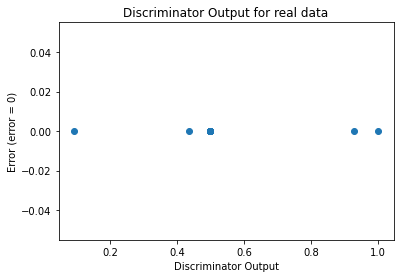

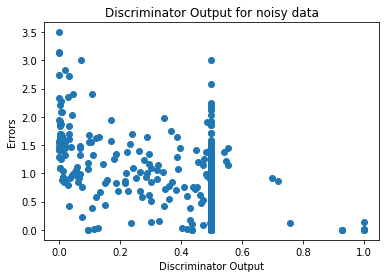

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)

# ABC - GAN Model with skip connection

In [14]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [15]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [16]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

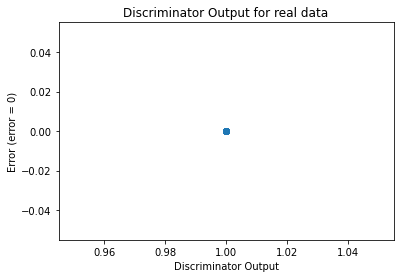

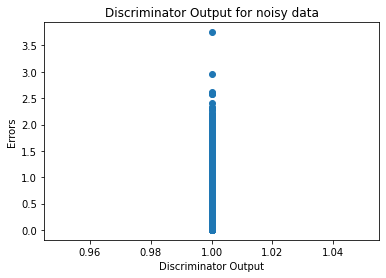

In [17]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [18]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1101]], device='cuda:0', requires_grad=True)
